<a href="https://colab.research.google.com/github/Hossain-MD-Rafat/ETMT_Project/blob/main/FullCode_Additional_ETMT_Project_LearnerNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business context

Employee Promotion means the ascension of an employee to higher ranks, this aspect of the job is what drives employees the most. The ultimate reward for dedication and loyalty towards an organization and the HR team plays an important role in handling all these promotion tasks based on ratings and other attributes available.

The HR team in JMD company stored data on the promotion cycle last year, which consists of details of all the employees in the company working last year and also if they got promoted or not, but every time this process gets delayed due to so many details available for each employee - it gets difficult to compare and decide.


### Objective

For the upcoming appraisal cycle, the HR team wants to utilize the stored data and leverage machine learning to make a model that will predict if a person is eligible for promotion or not. You, as a data scientist at JMD company, need to come up with the best possible model that will help the HR team to predict if a person is eligible for promotion or not.


### Data Description

- employee_id: Unique ID for the employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other training completed in the previous year on soft skills, technical skills, etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won: if awards won during the previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import SimpleImputer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataFrame = pd.read_csv('/content/drive/MyDrive/pgd_aiml/employee_promotion.csv')
df = dataFrame.copy()

Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [ ]:
df.shape

(54808, 13)

In [ ]:
df.sample(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
18778,55419,Operations,region_22,Bachelor's,m,other,2,36,5.000,9,0,NaN,0
14744,24961,Analytics,region_22,NaN,m,sourcing,1,35,1.000,10,0,86.000,0
1374,14727,Operations,region_15,Bachelor's,f,sourcing,1,43,4.000,7,0,53.000,0
34383,66304,Operations,region_7,Bachelor's,m,other,1,48,3.000,3,0,74.000,1
43691,5691,Sales & Marketing,region_7,Bachelor's,m,other,2,40,2.000,6,0,50.000,0
25553,22711,Sales & Marketing,region_26,Master's & above,m,other,1,40,3.000,2,1,56.000,0
45307,69973,Technology,region_7,Master's & above,m,sourcing,2,39,3.000,5,0,80.000,1
25229,14716,Sales & Marketing,region_2,Bachelor's,m,referred,2,38,5.000,11,0,51.000,0
17091,35541,Sales & Marketing,region_13,Bachelor's,m,sourcing,1,26,2.000,2,0,47.000,0
19940,34557,Procurement,region_10,Master's & above,m,other,1,42,4.000,7,0,67.000,0


In [ ]:
df.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0




*   We have total 54808 records where education, previous_year_rating and avg_training_score has missing values of 2409, 4124 and 2560 records accordingly.
*  We will impute the missing values later.



In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.000,39195.831,22586.581,1.000,19669.750,39225.500,58730.500,78298.000
no_of_trainings,54808.000,1.253,0.609,1.000,1.000,1.000,1.000,10.000
age,54808.000,34.804,7.660,20.000,29.000,33.000,39.000,60.000
previous_year_rating,50684.000,3.329,1.260,1.000,3.000,3.000,4.000,5.000
length_of_service,54808.000,5.866,4.265,1.000,3.000,5.000,7.000,37.000
awards_won,54808.000,0.023,0.150,0.000,0.000,0.000,0.000,1.000
avg_training_score,52248.000,63.712,13.522,39.000,51.000,60.000,77.000,99.000
is_promoted,54808.000,0.085,0.279,0.000,0.000,0.000,0.000,1.000




*   75% of the employees are less than 39 years old.
*   75% of the employees have less than 7 years of experience.



In [ ]:
df.describe(include='object').T

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,52399,3,Bachelor's,36669
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446




*   Almost one third of the employees are working on sales & marketing department
*   More than half of the employees are bachelor degree holder.
*   Majority of the employees are male.



In [ ]:
df.nunique()

,0
employee_id,54808
department,9
region,34
education,3
gender,2
recruitment_channel,3
no_of_trainings,10
age,41
previous_year_rating,5
length_of_service,35


In [ ]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in department are :
department
Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: count, dtype: int64
**************************************************
Unique values in region are :
region
region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34

In [ ]:
# employee_id column will not create any value for modelling.
df.drop(columns="employee_id", inplace=True)

In [ ]:
df["is_promoted"].value_counts(normalize=True)

,proportion
is_promoted,
0,0.915
1,0.085




*   91.5% employees are not recommended to be promoted



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the distribution of average training score of  employee ?
2. How is the distribution age of  employee ?
3. How does the change in length of service (`length_of_service`) vary by the employee's promotion status (`is_promoted`)?
4. How does the previous rating(`previous_year_rating`) vary by the employee's promotion status (`is_promoted`)?
5. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

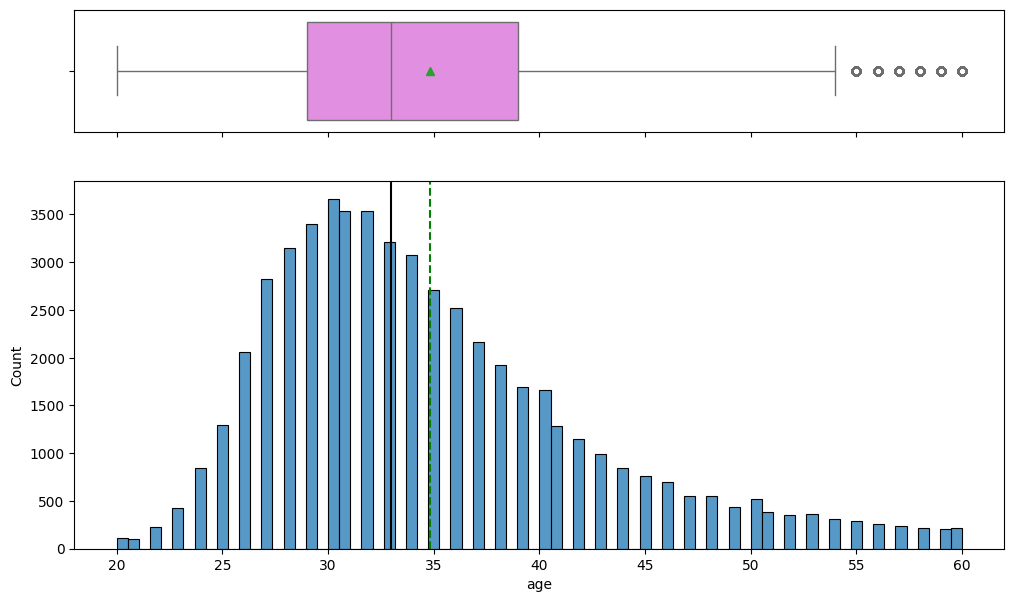

In [ ]:
histogram_boxplot(df, 'age')



*   The distribution of age is right-skewed
*   We have some outliers too



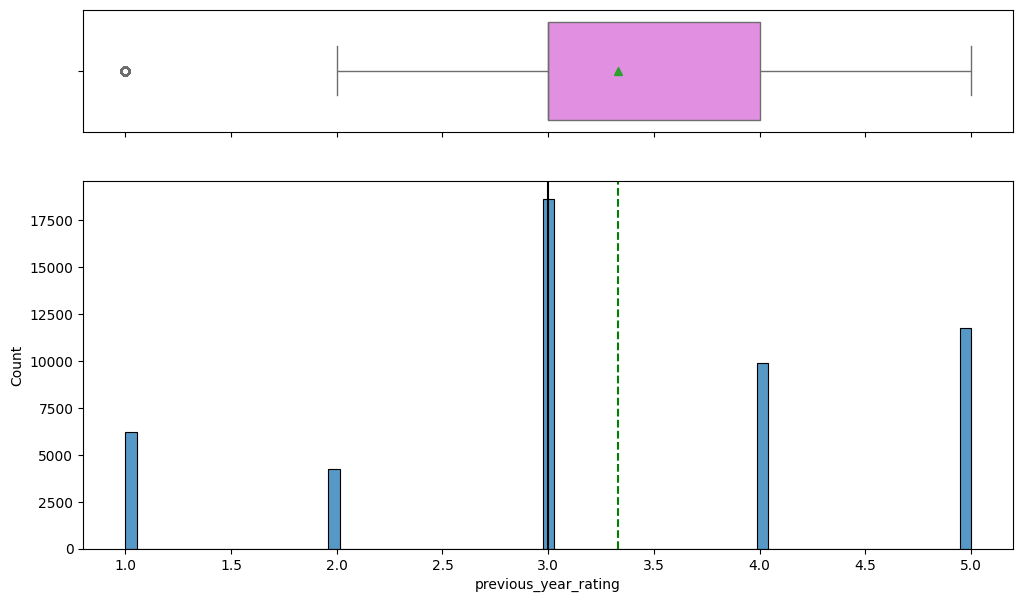

In [ ]:
histogram_boxplot(df, 'previous_year_rating')

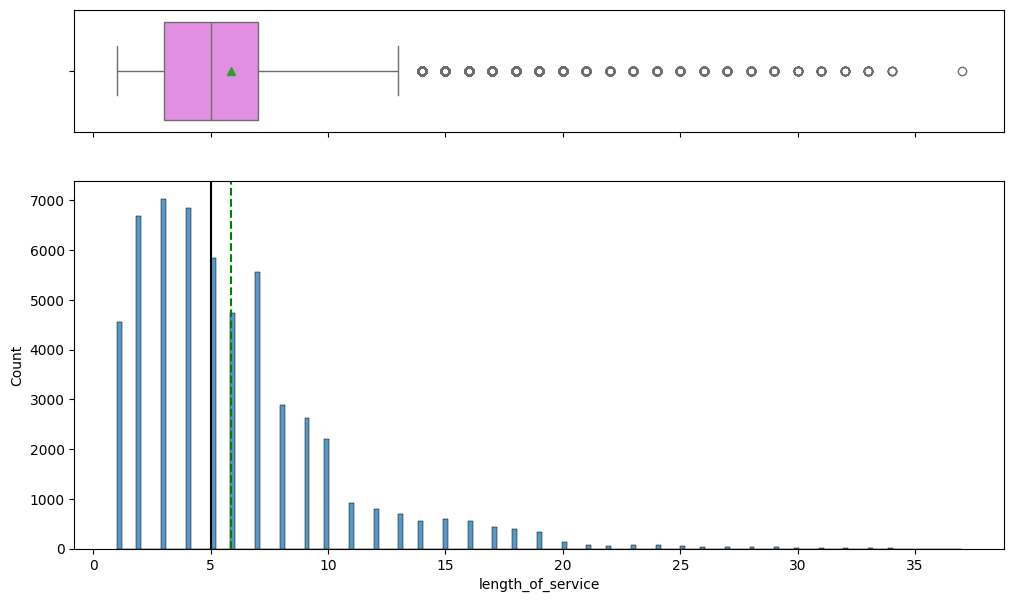

In [ ]:
histogram_boxplot(df, 'length_of_service')



*   As we talked earlier, majority of the employees have less than 7 years of experience.



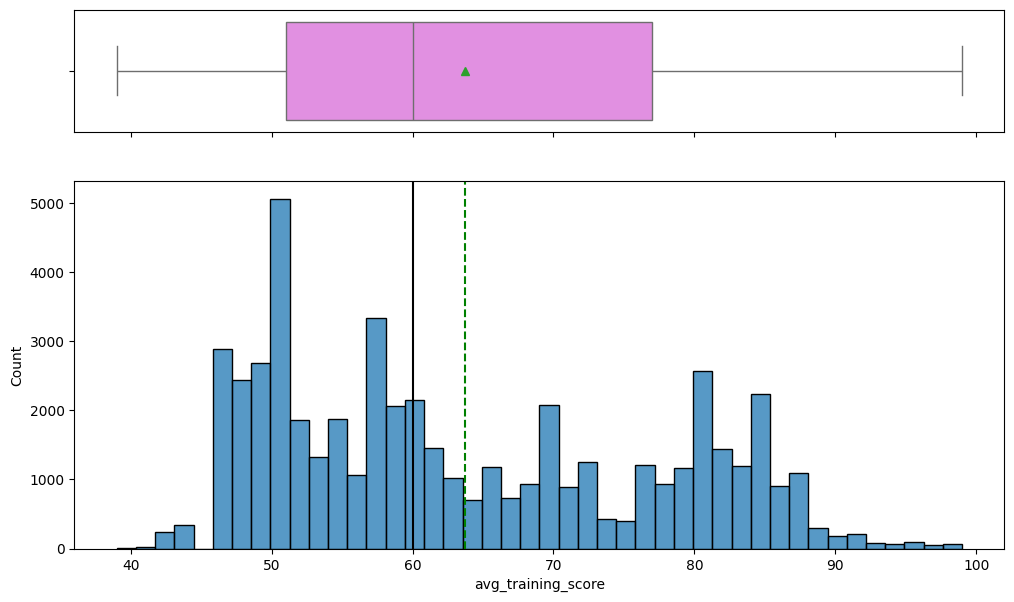

In [ ]:
histogram_boxplot(df, 'avg_training_score')

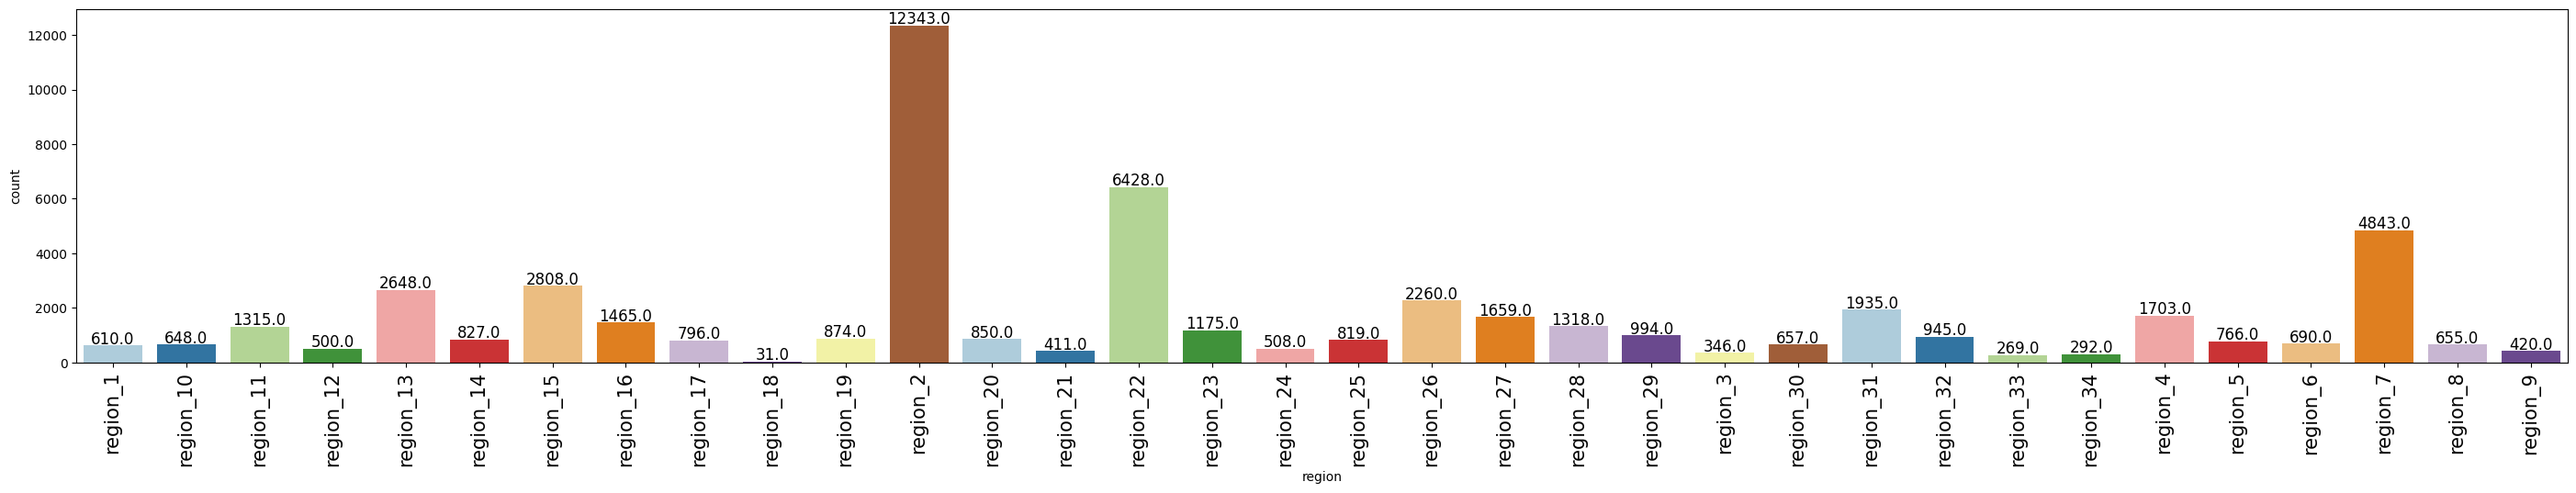

In [ ]:
labeled_barplot(df, 'region')



*   Most of employees work on the region_2



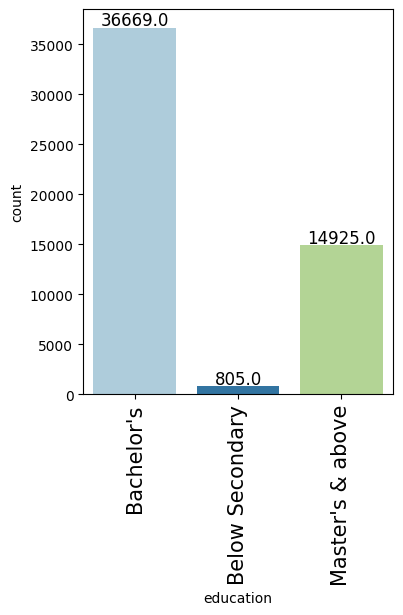

In [ ]:
labeled_barplot(df, 'education')

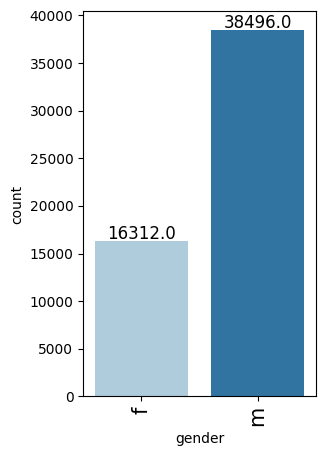

In [ ]:
labeled_barplot(df, 'gender')

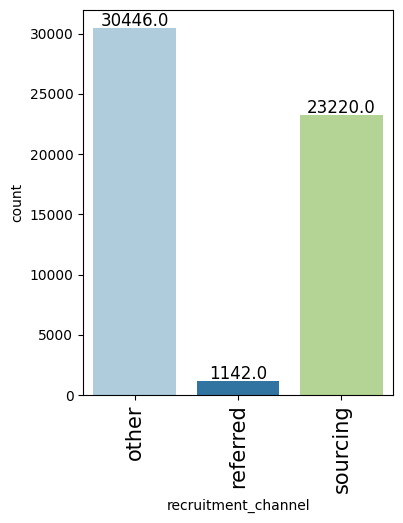

In [ ]:
labeled_barplot(df, 'recruitment_channel')

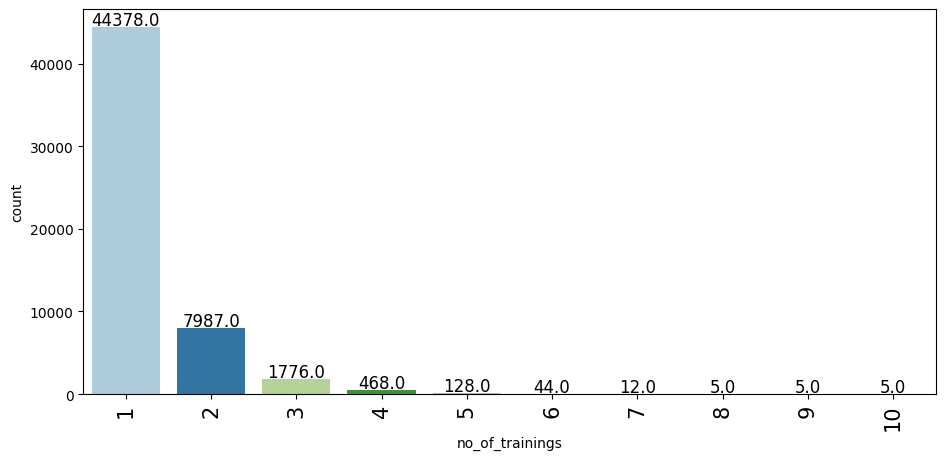

In [ ]:
labeled_barplot(df, 'no_of_trainings')

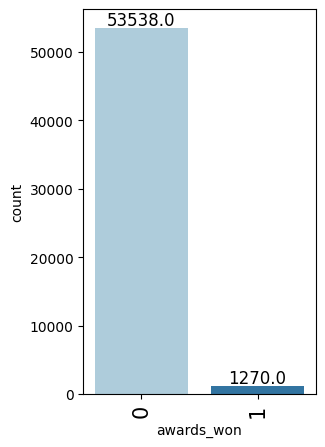

In [ ]:
labeled_barplot(df, 'awards_won')

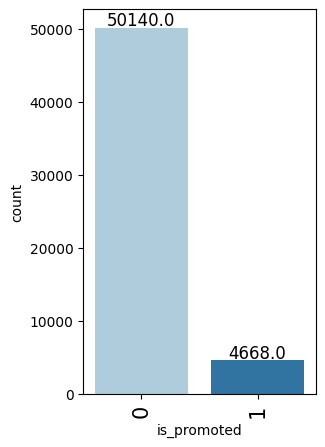

In [ ]:
labeled_barplot(df, 'is_promoted')

**Bivariate Analysis**

In [ ]:
#sns.pairplot(df, hue="is_promoted")

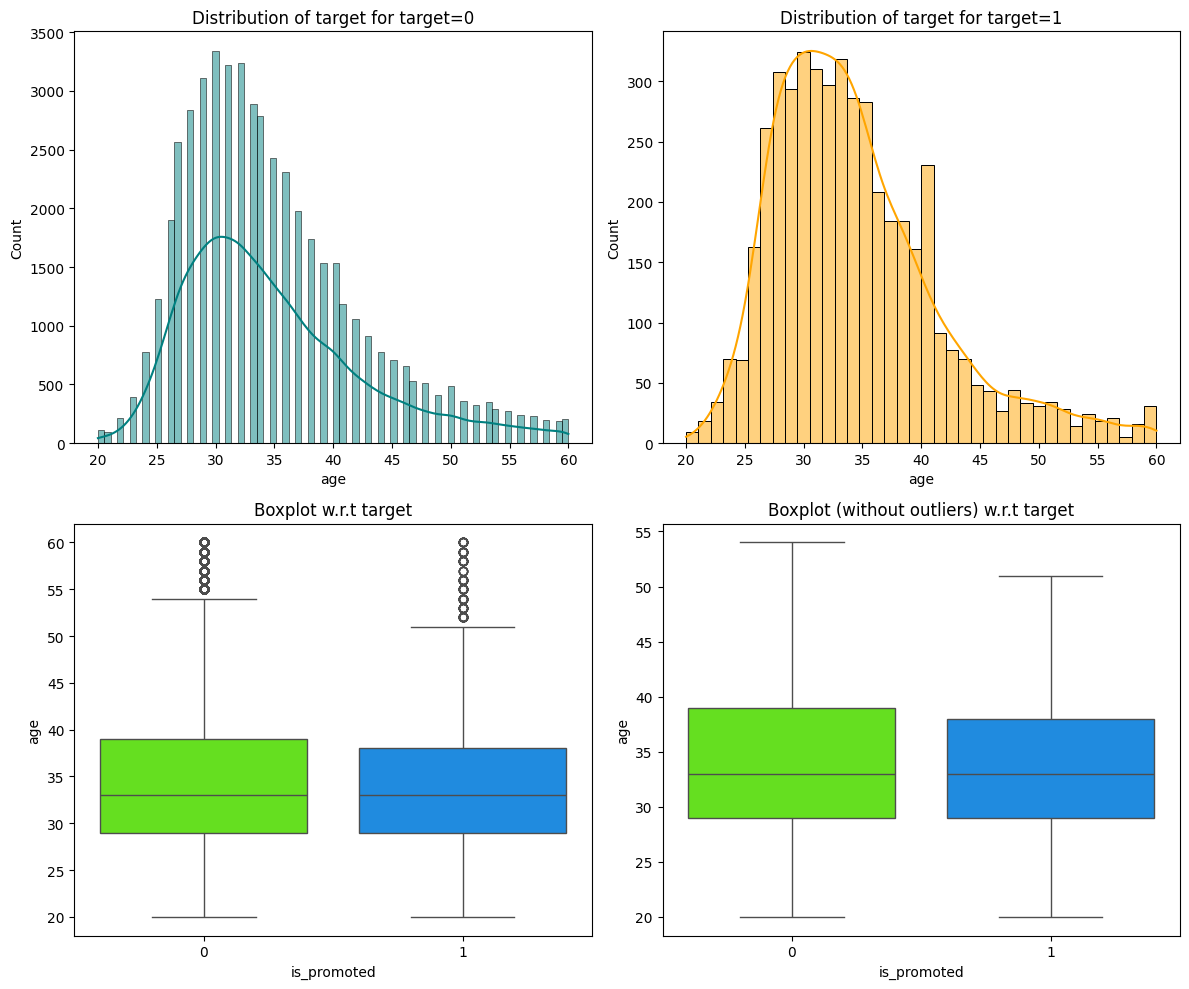

In [ ]:
distribution_plot_wrt_target(df, "age", "is_promoted")

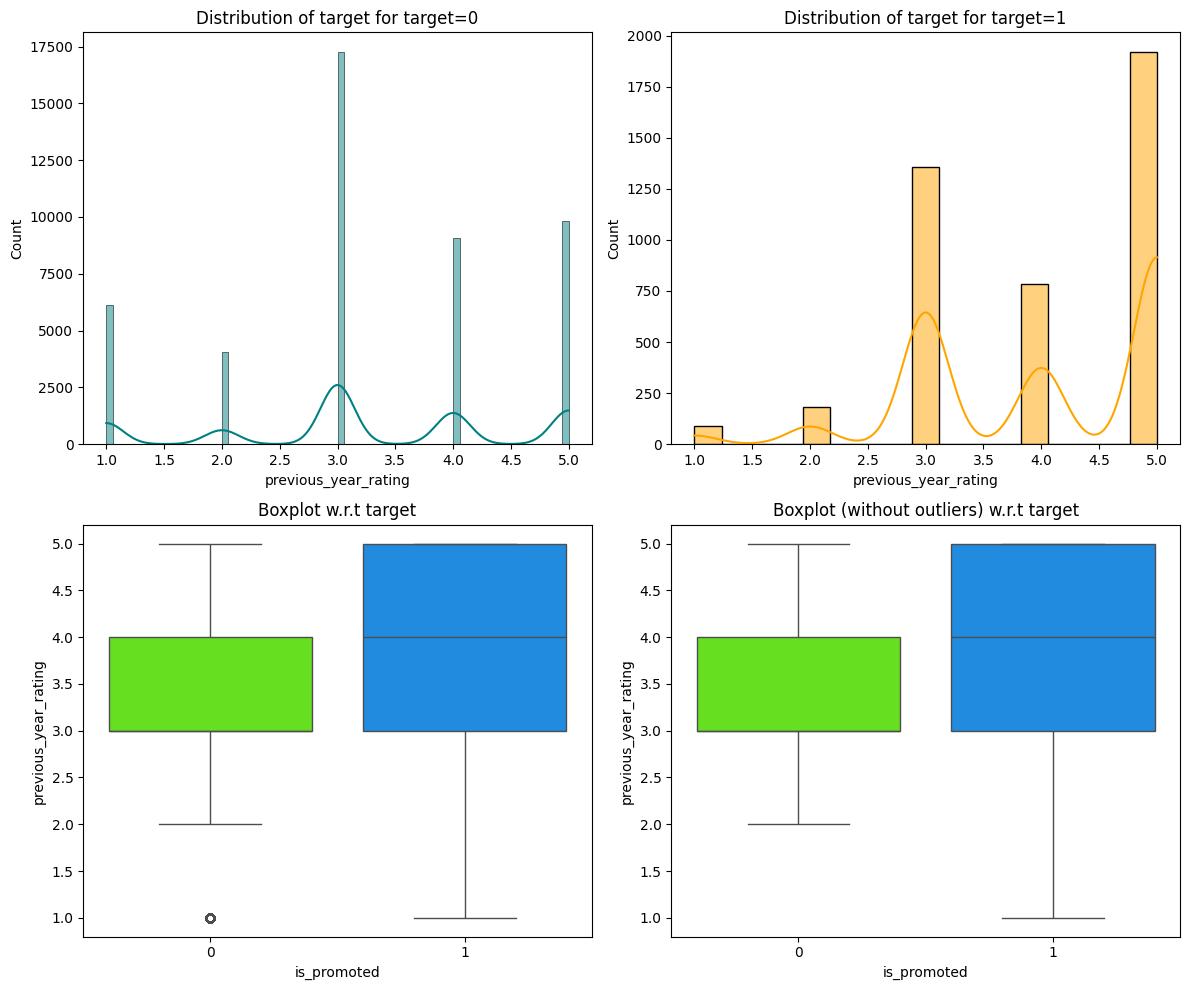

In [ ]:
distribution_plot_wrt_target(df, "previous_year_rating", "is_promoted")

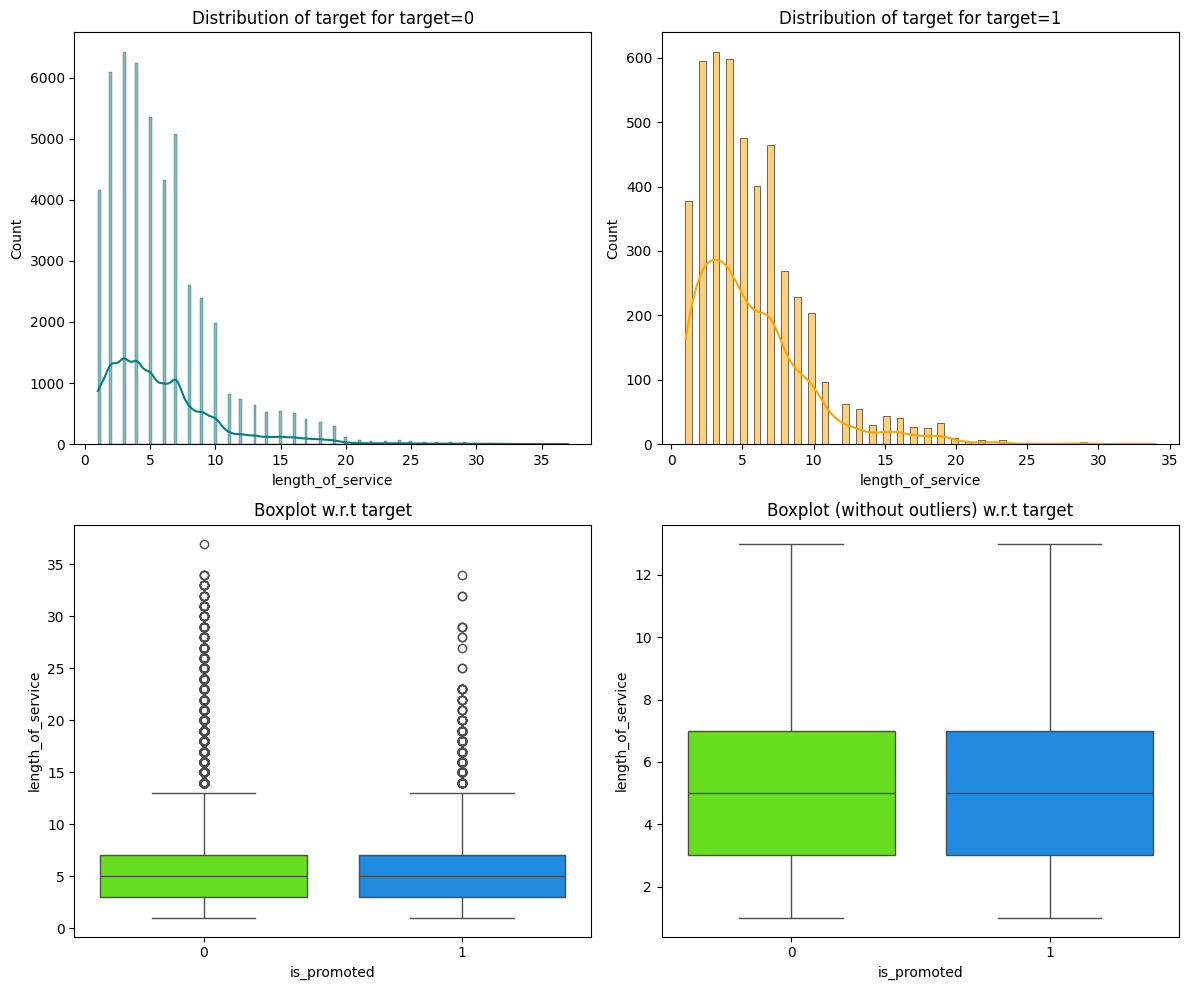

In [ ]:
distribution_plot_wrt_target(df, "length_of_service", "is_promoted")

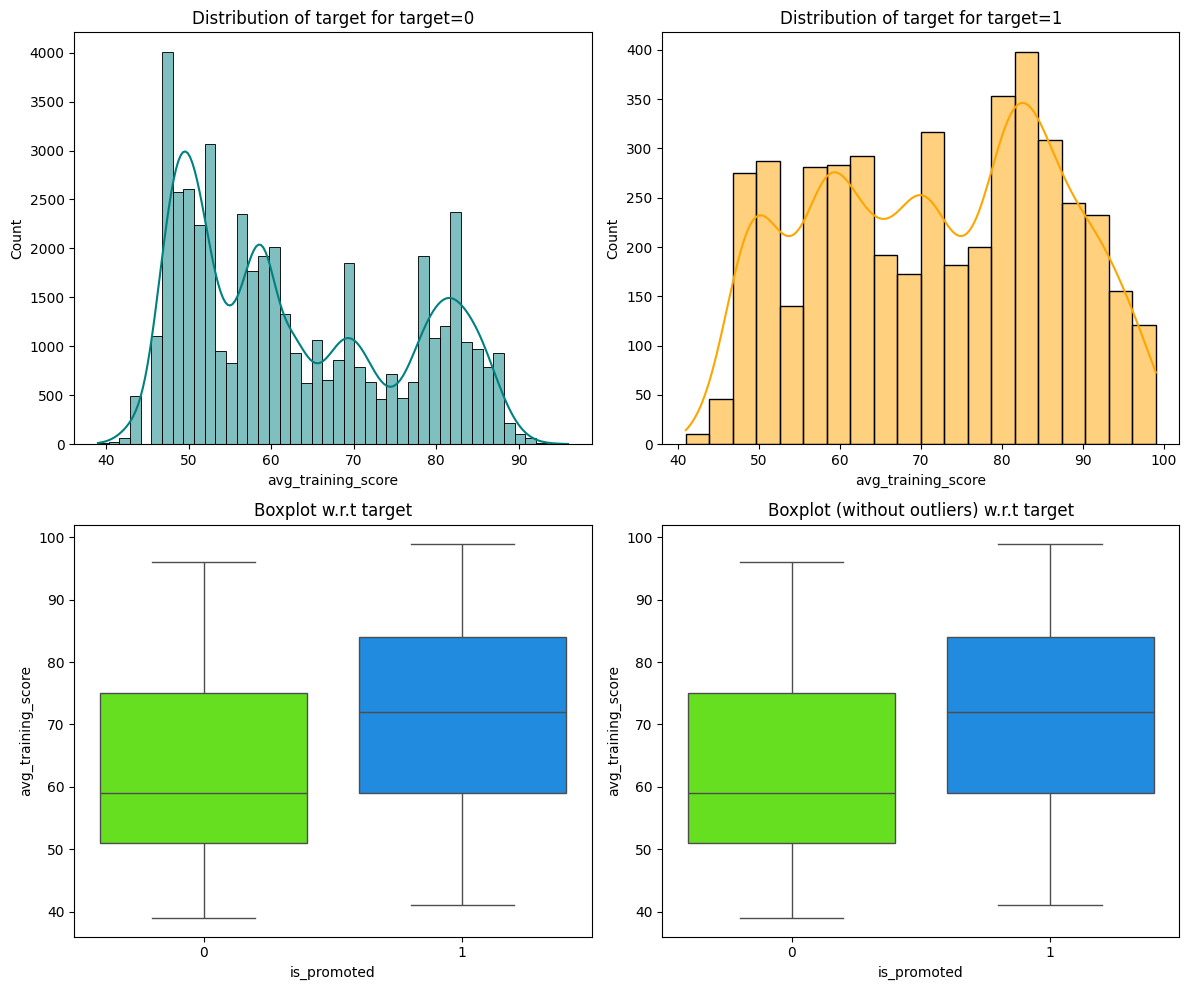

In [ ]:
distribution_plot_wrt_target(df, "avg_training_score", "is_promoted")

is_promoted            0     1    All
department                           
All                50140  4668  54808
Sales & Marketing  15627  1213  16840
Operations         10325  1023  11348
Technology          6370   768   7138
Procurement         6450   688   7138
Analytics           4840   512   5352
Finance             2330   206   2536
HR                  2282   136   2418
R&D                  930    69    999
Legal                986    53   1039
------------------------------------------------------------------------------------------------------------------------


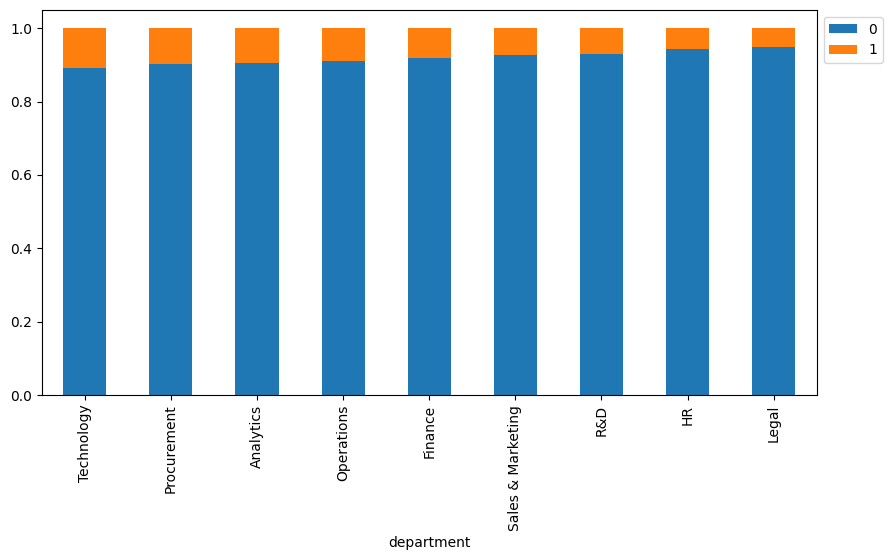

In [ ]:
stacked_barplot(df, "department", "is_promoted")

is_promoted      0     1    All
region                         
All          50140  4668  54808
region_2     11354   989  12343
region_22     5694   734   6428
region_7      4327   516   4843
region_4      1457   246   1703
region_13     2418   230   2648
region_15     2586   222   2808
region_28     1164   154   1318
region_26     2117   143   2260
region_23     1038   137   1175
region_27     1528   131   1659
region_31     1825   110   1935
region_17      687   109    796
region_25      716   103    819
region_16     1363   102   1465
region_11     1241    74   1315
region_14      765    62    827
region_30      598    59    657
region_1       552    58    610
region_19      821    53    874
region_8       602    53    655
region_10      597    51    648
region_20      801    49    850
region_29      951    43    994
region_32      905    40    945
region_3       309    37    346
region_5       731    35    766
region_12      467    33    500
region_6       658    32    690
region_2

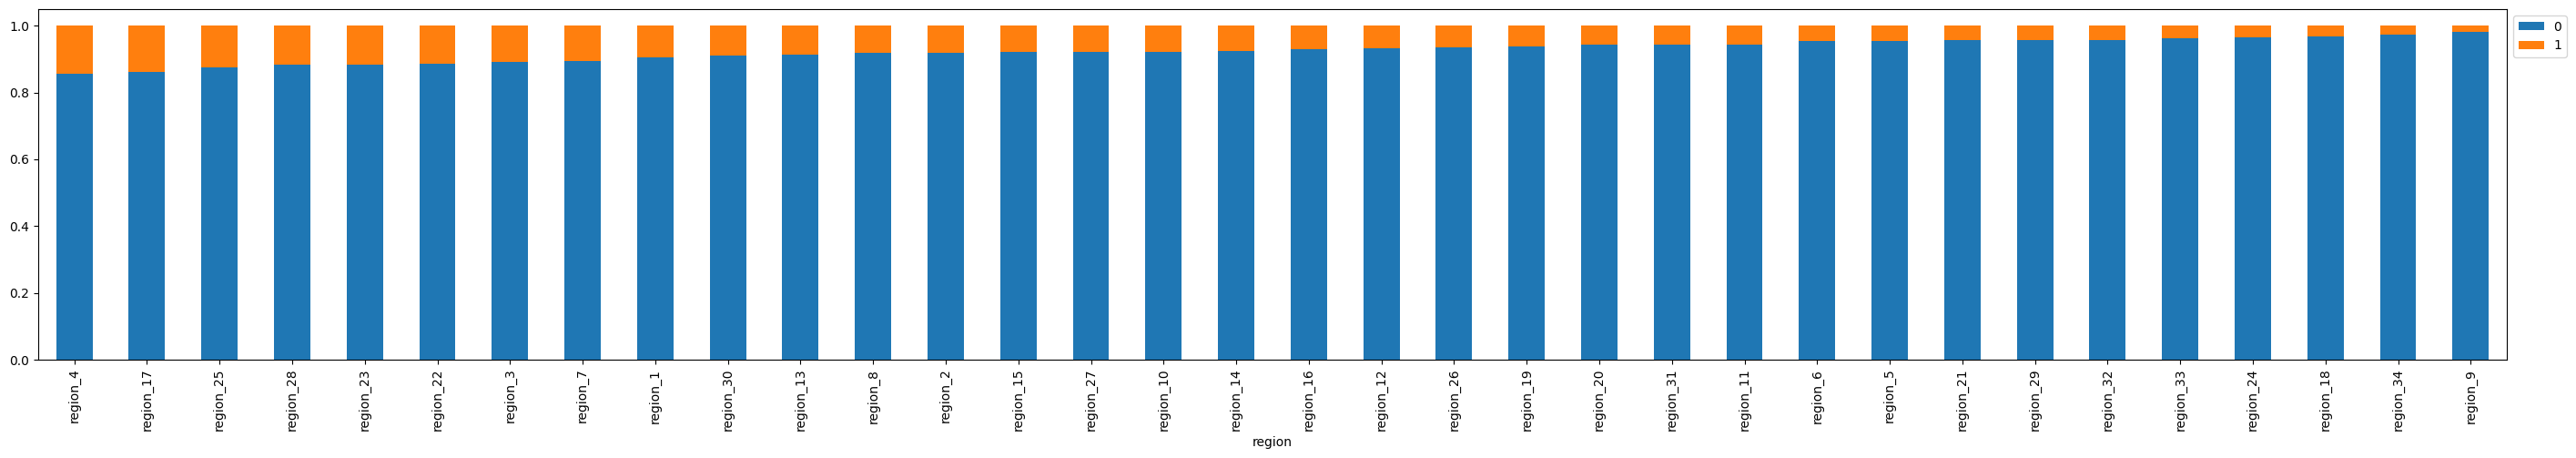

In [ ]:
stacked_barplot(df, "region", "is_promoted")

is_promoted           0     1    All
education                           
All               47853  4546  52399
Bachelor's        33661  3008  36669
Master's & above  13454  1471  14925
Below Secondary     738    67    805
------------------------------------------------------------------------------------------------------------------------


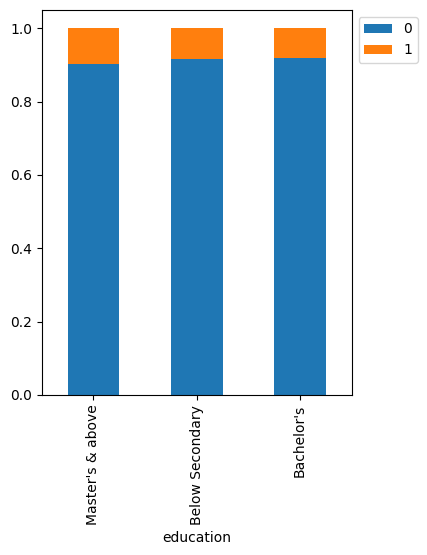

In [ ]:
stacked_barplot(df, "education", "is_promoted")

is_promoted      0     1    All
gender                         
All          50140  4668  54808
m            35295  3201  38496
f            14845  1467  16312
------------------------------------------------------------------------------------------------------------------------


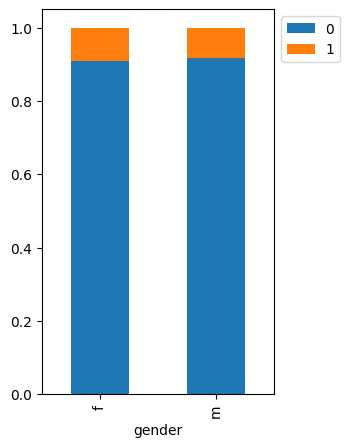

In [ ]:
stacked_barplot(df, "gender", "is_promoted")

is_promoted              0     1    All
recruitment_channel                    
All                  50140  4668  54808
other                27890  2556  30446
sourcing             21246  1974  23220
referred              1004   138   1142
------------------------------------------------------------------------------------------------------------------------


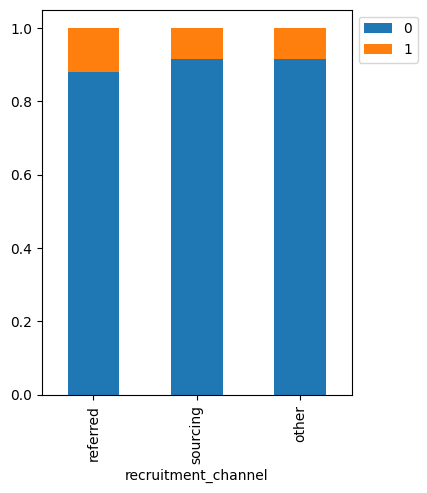

In [ ]:
stacked_barplot(df, "recruitment_channel", "is_promoted")

is_promoted          0     1    All
no_of_trainings                    
All              50140  4668  54808
1                40468  3910  44378
2                 7382   605   7987
3                 1654   122   1776
4                  442    26    468
5                  125     3    128
6                   42     2     44
7                   12     0     12
8                    5     0      5
9                    5     0      5
10                   5     0      5
------------------------------------------------------------------------------------------------------------------------


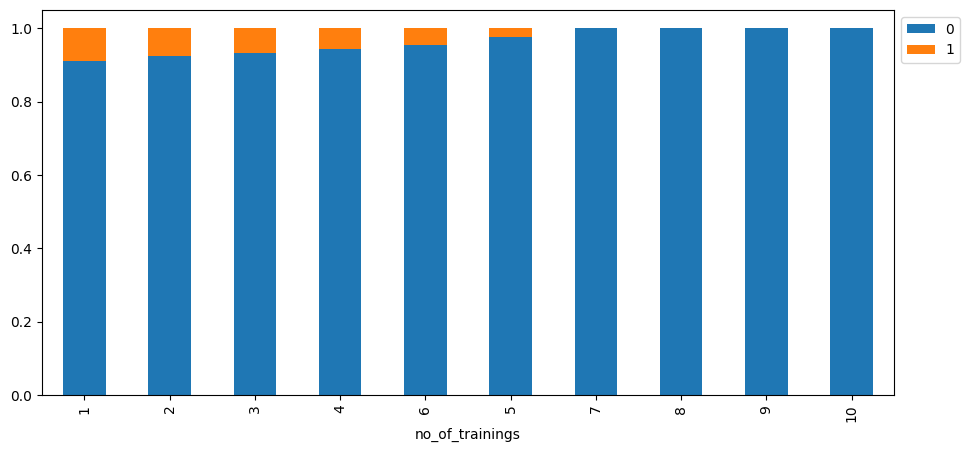

In [ ]:
stacked_barplot(df, "no_of_trainings", "is_promoted")

is_promoted      0     1    All
awards_won                     
All          50140  4668  54808
0            49429  4109  53538
1              711   559   1270
------------------------------------------------------------------------------------------------------------------------


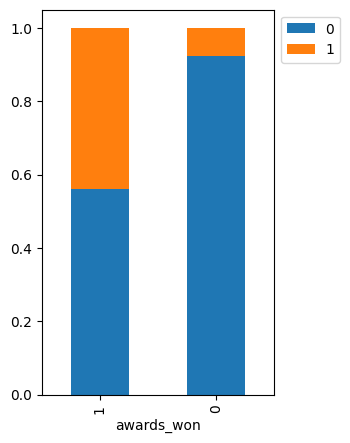

In [ ]:
stacked_barplot(df, "awards_won", "is_promoted")



*   The employee who won awards has the higher probability to get promotion



<Axes: xlabel='awards_won', ylabel='avg_training_score'>

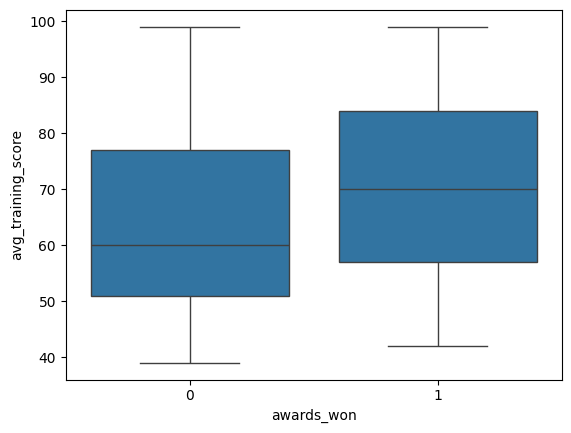

In [ ]:
sns.boxplot(data=df, x="awards_won", y="avg_training_score")

In [ ]:
# plt.figure(figsize=(15, 7))
# sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
# plt.show()

ValueError: could not convert string to float: 'Sales & Marketing'

<Figure size 1500x700 with 0 Axes>

## Data Pre-processing

**Train-Test split**

In [ ]:
X = df.drop(columns='is_promoted', inplace=False)
y = df['is_promoted']

In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, X_val.shape)

(35076, 11) (10962, 11) (8770, 11)


In [ ]:
mode_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [ ]:
# Fit and transform the train data
X_train[["education"]] = mode_imputer.fit_transform(X_train[["education"]])
X_val[["education"]] = mode_imputer.fit_transform(X_val[["education"]])
X_test[["education"]] = mode_imputer.fit_transform(X_test[["education"]])

In [ ]:
# Fit and transform the train data
X_train[["previous_year_rating", "avg_training_score"]] = median_imputer.fit_transform(
    X_train[["previous_year_rating", "avg_training_score"]]
)
X_val[["previous_year_rating", "avg_training_score"]] = median_imputer.fit_transform(
    X_val[["previous_year_rating", "avg_training_score"]]
)
X_test[["previous_year_rating", "avg_training_score"]] = median_imputer.fit_transform(
    X_test[["previous_year_rating", "avg_training_score"]]
)

In [ ]:
# Checking that no column has missing values in train, validation and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64
------------------------------
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
dtype: int64


In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)
print(X_train.shape, X_test.shape)

(35076, 52) (8770, 52) (10962, 52)
(35076, 52) (10962, 52)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Model Building with original data

Sample code for model building with original data

In [ ]:
models = []  # Empty list to store all the models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
## Complete the code to append remaining 4 models in the list models

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.8554376657824934
Random forest: 0.9920424403183024
GBM: 0.28713527851458887
Adaboost: 0.17009283819628648
Xgboost: 0.3696949602122016
dtree: 0.9946949602122016

Validation Performance:

Bagging: 0.34946236559139787
Random forest: 0.260752688172043
GBM: 0.271505376344086
Adaboost: 0.14919354838709678
Xgboost: 0.33064516129032256
dtree: 0.4166666666666667


### Model Building with Oversampled data


In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

**Model Building with oversampled data**

In [ ]:
print("\n" "Training Performance after oversampling:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance after oversampling:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance after oversampling:

Bagging: 0.9917342482844667
Random forest: 0.9996257018091079
GBM: 0.8583593262632564
Adaboost: 0.8622582657517155
Xgboost: 0.9152526512788521
dtree: 0.9995009357454773

Validation Performance after oversampling:

Bagging: 0.3333333333333333
Random forest: 0.2956989247311828
GBM: 0.46102150537634407
Adaboost: 0.4435483870967742
Xgboost: 0.3817204301075269
dtree: 0.3897849462365591


### Model Building with Undersampled data

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("\n" "Training Performance after undersampling:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance after undersampling:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance after undersampling:

Bagging: 0.9681697612732095
Random forest: 0.9993368700265252
GBM: 0.6147214854111406
Adaboost: 0.678050397877984
Xgboost: 0.8471485411140584
dtree: 0.9990053050397878

Validation Performance after undersampling:

Bagging: 0.6129032258064516
Random forest: 0.6720430107526881
GBM: 0.5913978494623656
Adaboost: 0.6586021505376344
Xgboost: 0.6559139784946236
dtree: 0.6774193548387096


### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Sample tuning method for Decision tree with original data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.1747355935554018:


In [ ]:
tuned_DT0 = DecisionTreeClassifier(
    min_samples_leaf = 7,
    min_impurity_decrease = 0.0001,
    max_leaf_nodes = 15,
    max_depth = 5
)
tuned_DT0.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [ ]:
dt0_train = model_performance_classification_sklearn(
    tuned_DT0, X_train, y_train
)

In [ ]:
dt0_val = model_performance_classification_sklearn(
    tuned_DT0, X_val, y_val
)

#### Sample tuning method for Decision tree with oversampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 4} with CV score=0.7174672489082969:


In [ ]:
tuned_DT1 = DecisionTreeClassifier(
    min_samples_leaf=1,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=4
)
tuned_DT1.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15,
                       min_impurity_decrease=0.001)

In [ ]:
dt1_train = model_performance_classification_sklearn(tuned_DT1, X_train_over, y_train_over)

In [ ]:
dt1_val = model_performance_classification_sklearn(
    tuned_DT1, X_val, y_val
)

#### Sample tuning method for Decision tree with undersampled data

In [ ]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 11} with CV score=0.6279858983229547:


In [ ]:
tuned_DT2 = DecisionTreeClassifier(
    min_samples_leaf=1,
    min_impurity_decrease=0.001,
    max_leaf_nodes=15,
    max_depth=11
)
tuned_DT2.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=11, max_leaf_nodes=15,
                       min_impurity_decrease=0.001)

In [ ]:
dt2_train = model_performance_classification_sklearn(tuned_DT2, X_train_un, y_train_un)

In [ ]:
dt2_val = model_performance_classification_sklearn(
    tuned_DT2, X_val, y_val
)

**Sample Tuning method for Gradient Boosting with original data**

In [ ]:
#Defining GBM
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.388590710904638:


In [ ]:
tuned_GB0 = GradientBoostingClassifier(
    subsample=1,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1)
)
tuned_GB0.fit(X_train, y_train)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5, subsample=1)

In [ ]:
gb0_train = model_performance_classification_sklearn(tuned_GB0, X_train, y_train)

In [ ]:
gb0_val = model_performance_classification_sklearn(tuned_GB0, X_val, y_val)

**Sample Tuning method for Gradient Boosting with OverSampled Data**

In [ ]:
#Defining Model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9378041172800998:


In [ ]:
tuned_GB1 = GradientBoostingClassifier(
    subsample=1,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1)
)
tuned_GB1.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.5, subsample=1)

In [ ]:
gb1_train = model_performance_classification_sklearn(tuned_GB1, X_train_over, y_train_over)

In [ ]:
gb1_val = model_performance_classification_sklearn(tuned_GB1, X_val, y_val)

**Sample Tuning method for Gradient Boosting with UnderSampled Data**

In [ ]:
#Defining Model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.661799171910865:


In [ ]:
tuned_GB2 = GradientBoostingClassifier(
    subsample=0.7,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1)
)
tuned_GB2.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5, subsample=0.7)

In [ ]:
gb2_train = model_performance_classification_sklearn(tuned_GB2, X_train_un, y_train_un)

In [ ]:
gb2_val = model_performance_classification_sklearn(tuned_GB2, X_val, y_val)

**Sample Tuning method for Random Forest with Original Data**

In [ ]:
#defining model
Model = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)
randomized_cv.fit(X_train, y_train)
print("Best parameters are {} with cv score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with cv score=0.22380591523618115:


In [ ]:
tuned_RF0 = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt'
)
tuned_RF0.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [ ]:
rf0_train = model_performance_classification_sklearn(tuned_RF0, X_train, y_train)

In [ ]:
rf0_val = model_performance_classification_sklearn(tuned_RF0, X_val, y_val)

**Sample Tuning method for Random Forest with Oversanpled Data**

In [ ]:
#defining model
Model = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)
randomized_cv.fit(X_train_over, y_train_over)
print("Best parameters are {} with cv score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with cv score=0.9440424204616343:


In [ ]:
tuned_RF1 = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt'
)
tuned_RF1.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [ ]:
rf1_train = model_performance_classification_sklearn(tuned_RF1, X_train_over, y_train_over)

In [ ]:
rf1_val = model_performance_classification_sklearn(tuned_RF1, X_val, y_val)

**Sample Tuning method for Random Forest with Undersampled Data**

In [ ]:
#defining model
Model = RandomForestClassifier(random_state=1)
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)
randomized_cv.fit(X_train_over, y_train_over)
print("Best parameters are {} with cv score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with cv score=0.9440424204616343:


In [ ]:
tuned_RF2 = RandomForestClassifier(
    n_estimators=250,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt'
)
tuned_RF2.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=250)

In [ ]:
rf2_train = model_performance_classification_sklearn(tuned_RF2, X_train_un, y_train_un)

In [ ]:
rf2_val = model_performance_classification_sklearn(tuned_RF2, X_val, y_val)

**Sample Tuning method for XGBoost with Original Data**

In [ ]:
#defining model
Model = XGBClassifier(random_state=1)
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)
randomized_cv.fit(X_train, y_train)
print("Best parameters are {} with cv score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 250, 'learning_rate': 0.2, 'gamma': 3} with cv score=0.5411117700679824:


In [ ]:
tuned_XGB0 = XGBClassifier(
    subsample=0.7,
    scale_pos_weight=10,
    n_estimators=250,
    learning_rate=0.2,
    gamma=3
)
tuned_XGB0.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb0_train = model_performance_classification_sklearn(tuned_XGB0, X_train, y_train)

In [ ]:
xgb0_val = model_performance_classification_sklearn(tuned_XGB0, X_val, y_val)

**Sample Tuning method for XGBoost with Oversampled Data**

In [ ]:
#defining model
Model = XGBClassifier(random_state=1)
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)
randomized_cv.fit(X_train_over, y_train_over)
print("Best parameters are {} with cv score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1} with cv score=0.9823456019962571:


In [ ]:
tuned_XGB1 = XGBClassifier(
    subsample=1,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.05,
    gamma=1
)
tuned_XGB1.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb1_train = model_performance_classification_sklearn(tuned_XGB1, X_train, y_train)

In [ ]:
xgb1_val = model_performance_classification_sklearn(tuned_XGB1, X_val, y_val)

**Sample Tuning method for XGBoost with Undersampled Data**

In [ ]:
#defining model
Model = XGBClassifier(random_state=1)
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs=-1, scoring=scorer, cv=5, random_state=1)
randomized_cv.fit(X_train_un, y_train_un)
print("Best parameters are {} with cv score={}:" .format(randomized_cv.best_params_, randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 5, 'n_estimators': 50, 'learning_rate': 0.05, 'gamma': 1} with cv score=0.9864062688763686:


In [ ]:
tuned_XGB2 = XGBClassifier(
    subsample=1,
    scale_pos_weight=5,
    n_estimators=50,
    learning_rate=0.05,
    gamma=1
)
tuned_XGB2.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb2_train = model_performance_classification_sklearn(tuned_XGB2, X_train, y_train)

In [ ]:
xgb2_val = model_performance_classification_sklearn(tuned_XGB2, X_val, y_val)

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dt0_train.T,
        dt1_train.T,
        dt2_train.T,
        gb0_train.T,
        gb1_train.T,
        gb2_train.T,
        rf0_train.T,
        rf1_train.T,
        rf2_train.T,
        xgb0_train.T,
        xgb1_train.T,
        xgb2_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree Model trained with Original data",
    "Decision Tree Model trained with OverSampled data",
    "Decision Tree Model trained with UnderSampled data",
    "Gradient Boosting Model trained with Original data",
    "Gradient Boosting Model trained with OverSampled data",
    "Gradient Boosting Model trained with UnderSampled data",
    "Random Forest Model trained with Original data",
    "Random Forest Model trained with OverSampled data",
    "Random Forest Model trained with UnderSampled data",
    "XGBoosting Model trained with Original data",
    "XGBoosting Model trained with OverSampled data",
    "XGBoosting Model trained with UnderSampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Model trained with Original data,Decision Tree Model trained with OverSampled data,Decision Tree Model trained with UnderSampled data,Gradient Boosting Model trained with Original data,Gradient Boosting Model trained with OverSampled data,Gradient Boosting Model trained with UnderSampled data,Random Forest Model trained with Original data,Random Forest Model trained with OverSampled data,Random Forest Model trained with UnderSampled data,XGBoosting Model trained with Original data,XGBoosting Model trained with OverSampled data,XGBoosting Model trained with UnderSampled data
Accuracy,0.926,0.755,0.702,1.000,1.000,0.766,0.973,0.997,0.995,0.900,0.441,0.208
Recall,0.178,0.710,0.630,0.995,1.000,0.698,0.682,0.995,0.994,0.912,0.915,0.997
Precision,0.838,0.780,0.737,1.000,1.000,0.808,1.000,0.999,0.996,0.459,0.125,0.098
F1,0.294,0.744,0.679,0.997,1.000,0.749,0.811,0.997,0.995,0.610,0.220,0.178


In [ ]:
# Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        dt0_val.T,
        dt1_val.T,
        dt2_val.T,
        gb0_val.T,
        gb1_val.T,
        gb2_val.T,
        rf0_val.T,
        rf1_val.T,
        rf2_val.T,
        xgb0_val.T,
        xgb1_val.T,
        xgb2_val.T,
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Decision Tree Model validation with Original data",
    "Decision Tree Model validation with OverSampled data",
    "Decision Tree Model validation with UnderSampled data",
    "Gradient Boosting Model validation with Original data",
    "Gradient Boosting Model validation with OverSampled data",
    "Gradient Boosting Model validation with UnderSampled data",
    "Random Forest Model validation with Original data",
    "Random Forest Model validation with OverSampled data",
    "Random Forest Model validation with UnderSampled data",
    "XGBoosting Model validation with Original data",
    "XGBoosting Model validation with OverSampled data",
    "XGBoosting Model validation with UnderSampled data"
]
print("Validation performance comparison:")
models_valid_comp_df

Validation performance comparison:


,Decision Tree Model validation with Original data,Decision Tree Model validation with OverSampled data,Decision Tree Model validation with UnderSampled data,Gradient Boosting Model validation with Original data,Gradient Boosting Model validation with OverSampled data,Gradient Boosting Model validation with UnderSampled data,Random Forest Model validation with Original data,Random Forest Model validation with OverSampled data,Random Forest Model validation with UnderSampled data,XGBoosting Model validation with Original data,XGBoosting Model validation with OverSampled data,XGBoosting Model validation with UnderSampled data
Accuracy,0.927,0.771,0.759,0.885,0.873,0.784,0.933,0.918,0.750,0.842,0.433,0.206
Recall,0.164,0.497,0.647,0.417,0.390,0.655,0.234,0.305,0.687,0.555,0.886,0.985
Precision,0.884,0.184,0.206,0.351,0.305,0.230,0.921,0.532,0.207,0.282,0.119,0.095
F1,0.277,0.269,0.313,0.381,0.342,0.340,0.373,0.388,0.318,0.374,0.209,0.174




*   We can see XGBoosting with undersampled data gives similar and better perfomance
*   Now we will test the model on test data



### Test set final performance

In [ ]:
# Let's check the performance on test set
Model_test = model_performance_classification_sklearn(tuned_XGB2, X_test, y_test)
Model_test

,Accuracy,Recall,Precision,F1
0,0.201,0.980,0.092,0.169


**Feature Importance**

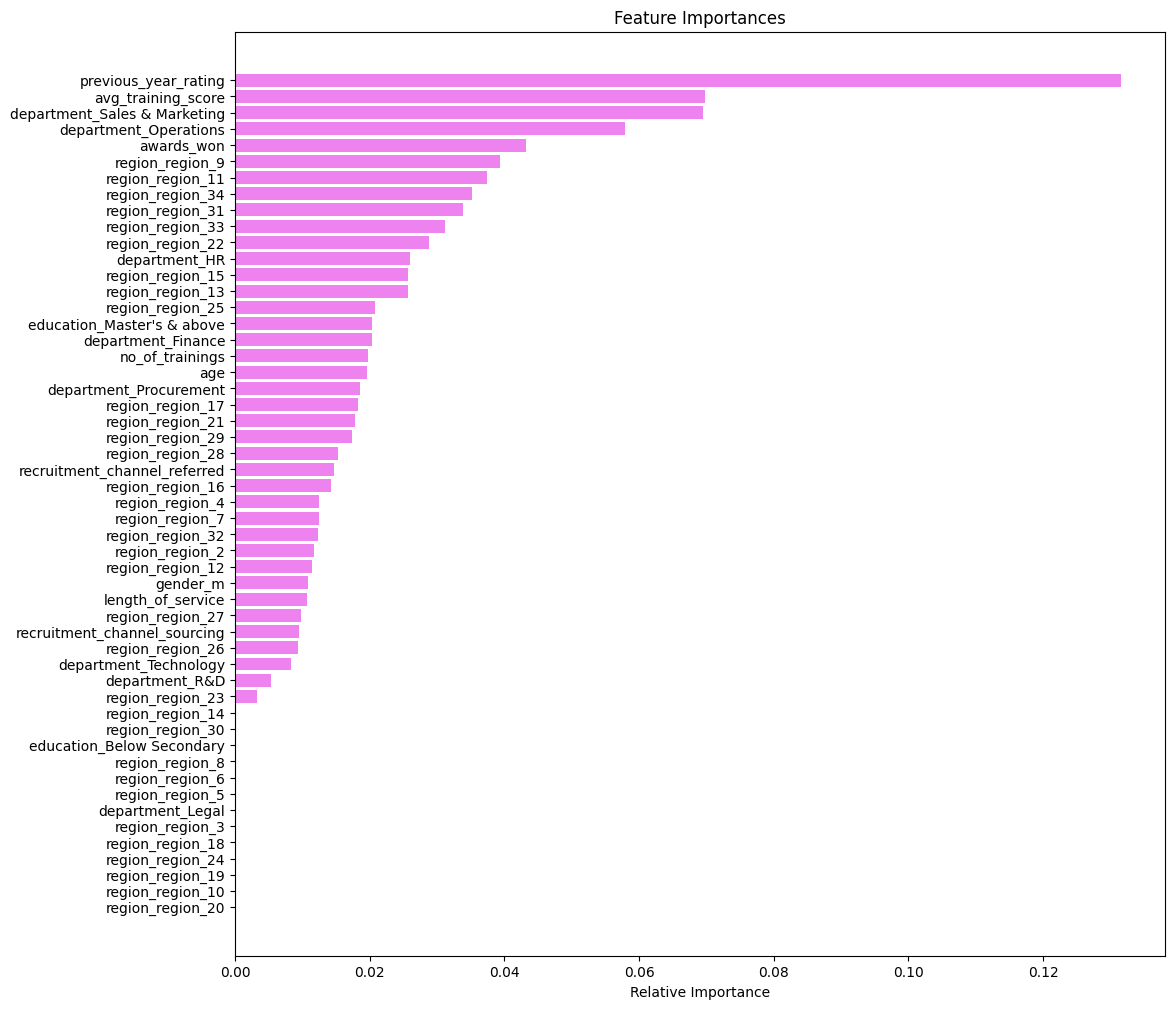

In [ ]:
feature_names = X_train.columns
importances = tuned_XGB2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Business Insights and Conclusions



*   The model performance can be improved, especially in terms of precision and the bank can use use the model for new customers once desired level of model performance is achieved.
*   Employees who won awards have higher chance to be promoted
*   Employees with a greater average training score are likely to be promoted
*   Employees who have a good previous year score are likely to get a promotion



In [ ]:
!jupyter nbconvert --to html FullCode_Additional_ETMT_Project_LearnerNotebook.ipynb

-


***